In [1]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

**Initial model chosen is linear regression model**

In [2]:
#first, load in the cleaned data file
cbb = pd.read_csv('cbb_full.csv')
cbb

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,The Citadel,SC,30,5,93.6,117.5,0.0687,46.9,54.5,19.5,...,32.8,32.8,49.5,56.3,29.2,34.7,64.5,-21.5,NaN,2025
4245,Chicago St.,NEC,32,4,92.5,116.1,0.0682,44.4,54.9,18.5,...,26.8,36.9,43.4,55.7,30.6,35.8,68.5,-21.8,NaN,2025
4246,Coppin St.,MEAC,30,6,87.8,112.4,0.0550,44.0,55.6,21.6,...,36.4,37.1,44.2,56.3,29.0,36.3,67.9,-19.0,NaN,2025
4247,Arkansas Pine Bluff,SWAC,31,6,95.0,121.7,0.0549,50.3,56.3,20.4,...,32.8,40.5,52.6,58.5,31.0,35.7,71.6,-20.1,NaN,2025


To do a linear regression model, however, we need to turn any string/object columns to numerical

In [3]:
#determine which columns are object/string types
cbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     4249 non-null   object 
 1   CONF     4249 non-null   object 
 2   G        4249 non-null   int64  
 3   W        4249 non-null   int64  
 4   ADJOE    4249 non-null   float64
 5   ADJDE    4249 non-null   float64
 6   BARTHAG  4249 non-null   float64
 7   EFG_O    4249 non-null   float64
 8   EFG_D    4249 non-null   float64
 9   TOR      4249 non-null   float64
 10  TORD     4249 non-null   float64
 11  ORB      4249 non-null   float64
 12  DRB      4249 non-null   float64
 13  FTR      4249 non-null   float64
 14  FTRD     4249 non-null   float64
 15  2P_O     4249 non-null   float64
 16  2P_D     4249 non-null   float64
 17  3P_O     4249 non-null   float64
 18  3P_D     4249 non-null   float64
 19  ADJ_T    4249 non-null   float64
 20  WAB      4249 non-null   float64
 21  SEED     816 n

Only the first 2 columns are strings and will need to be converted to numerical values

We can use one hot encoding (get_dummies) to do this

First, we need to know what the unique values are in the teams and conference columns to convert them to numerical values

In [4]:
unique_teams = cbb['TEAM'].unique()
unique_conf = cbb['CONF'].unique()

unique_values = {'teams': unique_teams,
'conferences': unique_conf}
unique_values_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in unique_values.items() ]))
unique_values_df

,teams,conferences
0,North Carolina,ACC
1,Wisconsin,B10
2,Michigan,B12
3,Texas Tech,WCC
4,Gonzaga,SEC
...,...,...
374,Louisiana,NaN
375,IU Indy,NaN
376,Mercyhurst,NaN
377,West Georgia,NaN


In [5]:
#making dictionaries to map team and conference names to numerical values

team_dict = {}
conf_dict = {}
i = 0
for team in unique_teams:
    team_dict[team] = i
    i += 1

k = 0
for conf in unique_conf:
    conf_dict[conf] = k
    k += 1


Now that we have the unique values for each column mapped to a numerical value, we can replace the strings in each column with a number

In [6]:
#converting the TEAM and CONF columns to numerical values using the mapping dictionaries
cbb['TEAM'] = cbb['TEAM'].map(team_dict)
cbb['CONF'] = cbb['CONF'].map(conf_dict)
cbb

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
0,0,0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1.0,2016
1,1,1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,1.0,2015
2,2,1,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,3.0,2018
3,3,2,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,3.0,2019
4,4,3,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,289,28,30,5,93.6,117.5,0.0687,46.9,54.5,19.5,...,32.8,32.8,49.5,56.3,29.2,34.7,64.5,-21.5,NaN,2025
4245,337,24,32,4,92.5,116.1,0.0682,44.4,54.9,18.5,...,26.8,36.9,43.4,55.7,30.6,35.8,68.5,-21.8,NaN,2025
4246,200,22,30,6,87.8,112.4,0.0550,44.0,55.6,21.6,...,36.4,37.1,44.2,56.3,29.0,36.3,67.9,-19.0,NaN,2025
4247,329,31,31,6,95.0,121.7,0.0549,50.3,56.3,20.4,...,32.8,40.5,52.6,58.5,31.0,35.7,71.6,-20.1,NaN,2025


There are some null values in the SEED column that need to be removed

In [7]:
#making sure that there are no more object/string columns and export cleaned data to new csv
cbb.info()

#also add in a column with win percentage before exporting
cbb['WIN_PCT'] = cbb['W'] / cbb['G']

#replace null values in the SEED column with 0 values
cbb['SEED'] = cbb['SEED'].fillna(0)
cbb['SEED']

cbb.to_csv('cbb_numerical.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     4249 non-null   int64  
 1   CONF     4249 non-null   int64  
 2   G        4249 non-null   int64  
 3   W        4249 non-null   int64  
 4   ADJOE    4249 non-null   float64
 5   ADJDE    4249 non-null   float64
 6   BARTHAG  4249 non-null   float64
 7   EFG_O    4249 non-null   float64
 8   EFG_D    4249 non-null   float64
 9   TOR      4249 non-null   float64
 10  TORD     4249 non-null   float64
 11  ORB      4249 non-null   float64
 12  DRB      4249 non-null   float64
 13  FTR      4249 non-null   float64
 14  FTRD     4249 non-null   float64
 15  2P_O     4249 non-null   float64
 16  2P_D     4249 non-null   float64
 17  3P_O     4249 non-null   float64
 18  3P_D     4249 non-null   float64
 19  ADJ_T    4249 non-null   float64
 20  WAB      4249 non-null   float64
 21  SEED     816 n

Now we can split the data, make our training data, and fit our model

In [8]:
#split into x and y variables
y = cbb['WIN_PCT']
X = cbb.drop(columns=['WIN_PCT'])

#split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(f"X_train shape: {X_train.shape}; Y_train shape: {y_train.shape}")

#fit an KNN model
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', algorithm='brute')
knn.fit(X_train, y_train)

X_train shape: (3399, 23); Y_train shape: (3399,)


KNeighborsRegressor(algorithm='brute', n_neighbors=10, weights='distance')

Now let's make some figures and calculate statistics to evaluate the initial model performance

Mean Absolute Error: 0.0500236181775843
Mean Squared Error: 0.00420220541891623
Root Mean Squared Error: 0.06482441992734089
R^2: 0.8719781854734653


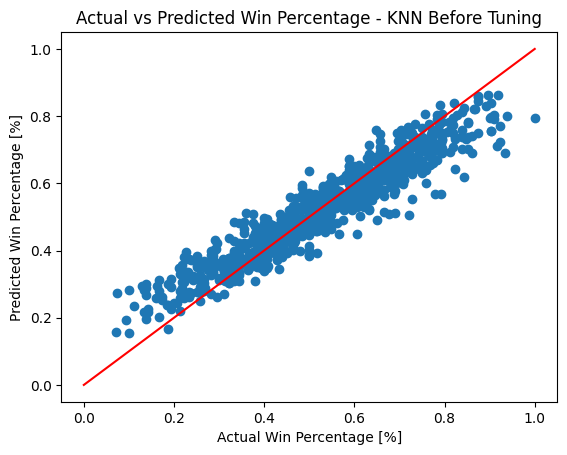

In [9]:
y_pred = knn.predict(X_test)
#evaluate model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#R^2 value
print('R^2:', metrics.r2_score(y_test, y_pred))
#Now let's make some figures and calculate statistics to evaluate the initial model performance
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Win Percentage [%]")
plt.ylabel("Predicted Win Percentage [%]")
plt.title("Actual vs Predicted Win Percentage - KNN Before Tuning")
plt.plot([0,1], [0,1], color='red') 
plt.show()

This performance is fairly good, but let's try and refine the model parameters to see if we can make it better

In [12]:
param_grid_lg = {'n_neighbors': [1, 2, 5, 10, 15, 20, 25, 30],
                 'weights': ['uniform', 'distance'],
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

lg_grid = RandomizedSearchCV(estimator=KNeighborsRegressor(), 
                            param_distributions=param_grid_lg  
                            )

lg_grid.fit(X_train, y_train)
print(lg_grid.best_params_)

{'weights': 'distance', 'n_neighbors': 15, 'algorithm': 'auto'}


Now let's rerun the model with the updated parameters and see if the performance improves

Mean Absolute Error: 0.04883254312395117
Mean Squared Error: 0.003945307467911317
Root Mean Squared Error: 0.06281168257506972
R^2: 0.879804680981693


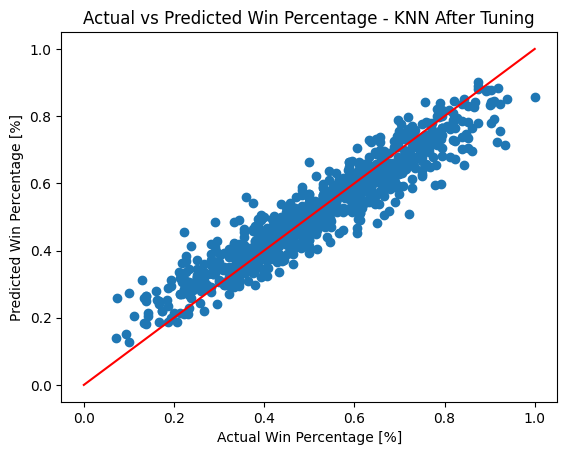

In [13]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
#evaluate model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#R^2 value
print('R^2:', metrics.r2_score(y_test, y_pred))
#Now let's make some figures and calculate statistics to evaluate the initial model performance
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Win Percentage [%]")
plt.ylabel("Predicted Win Percentage [%]")
plt.title("Actual vs Predicted Win Percentage - KNN After Tuning")
plt.plot([0,1], [0,1], color='red') 
plt.show()

The model is marginally better

Let's try and compare KNN to a linear regression model too

Mean Absolute Error: 0.013519856565685558
Mean Squared Error: 0.00045913500928398574
Root Mean Squared Error: 0.021427435900825506
R^2: 0.9860122742366192


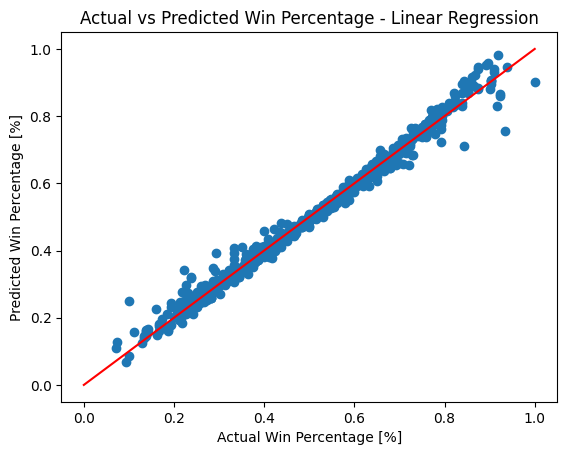

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
#evaluate model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#R^2 value
print('R^2:', metrics.r2_score(y_test, y_pred))
#Now let's make some figures and calculate statistics to evaluate the initial model performance
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Win Percentage [%]")
plt.ylabel("Predicted Win Percentage [%]")
plt.title("Actual vs Predicted Win Percentage - Linear Regression")
plt.plot([0,1], [0,1], color='red') 
plt.show()

The linear regression model performs significantly better than the KNN model

In [15]:
# get weights from linear regression model
weights = lr.coef_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Weight': weights})
feature_importance = feature_importance.reindex(feature_importance.Weight.abs().sort_values(ascending=False).index)
print(feature_importance)

    Feature    Weight
6   BARTHAG  0.087931
3         W  0.032103
2         G -0.017855
7     EFG_O  0.003025
20      WAB -0.002900
9       TOR -0.002721
10     TORD  0.002069
16     2P_D -0.001826
18     3P_D -0.001556
4     ADJOE -0.001496
5     ADJDE  0.001308
11      ORB  0.001212
12      DRB -0.001071
22     YEAR  0.000540
8     EFG_D  0.000522
13      FTR  0.000512
17     3P_O -0.000318
1      CONF -0.000189
15     2P_O -0.000155
14     FTRD -0.000153
21     SEED -0.000110
19    ADJ_T  0.000033
0      TEAM  0.000016
